In [1]:
"""Using a dataset related to the FIFA 2022 video game (included in repository) by Stefano Leone, 
I will load and inspect the data."""

import pandas as pd
import numpy as np                     
import matplotlib.pyplot as plt

# Loading the dataset fifa22.csv and displaying the first 5 rows
data_df = pd.read_csv("fifa22.csv")
data_df
print(data_df.head())

# Calculating the number of observations and features in the dataset
print("Current data observations and features: ", data_df.shape)

                             name  rank gender  wage_eur   log_wage position  \
0  Lionel Andrés Messi Cuccittini    93      M  320000.0  12.676076       RW   
1      Lucia Roberta Tough Bronze    92      F       NaN        NaN      NaN   
2                Vivianne Miedema    92      F       NaN        NaN      NaN   
3       Wéndèleine Thérèse Renard    92      F       NaN        NaN      NaN   
4              Robert Lewandowski    92      M  270000.0  12.506177       ST   

   nationality                 club                league preferred_foot  \
0    Argentina  Paris Saint-Germain        French Ligue 1           Left   
1      England                  NaN                   NaN          Right   
2  Netherlands                  NaN                   NaN          Right   
3       France                  NaN                   NaN          Right   
4       Poland    FC Bayern München  German 1. Bundesliga          Right   

   shooting  passing  dribbling  defending  attacking  skill  

In [17]:
"""Given that the "gender column" provides the gender of the player with binary options of "M" for male 
and "F" for female, I am calculating how many male and female players are in this dataset."""

gender_data = data_df[["gender"]] 

males = 0
females = 0
for index, row in gender_data.iterrows():
    if row["gender"] == "M":
        males +=1
    elif row["gender"] == "F":
        females += 1
        
print("The number of males is", males, " and the number of females is", females)

"""The dataset includes many missing values, particularly for female players- meaning I don't want to drop 
all rows where any value is NaN, as that will disproportionately remove women from the dataset. 
Instead, I want to be more targeted: drop only rows where the column 'passing' contains a missing NaN value. 
The final datadrame should have 17,450 observations."""
data_df
for index, row in data_df.iterrows():
    if str(row["passing"]) == "nan":
        data_df.drop(index, inplace=True)
        
        
print("Changed data observations and features: ", data_df.shape)
    

The number of males is 17107  and the number of females is 343
Changed data observations and features:  (17450, 20)


In [26]:
"""Here, I will perform multiple linear regression using the statsmodel package."""

import statsmodels.formula.api as smf
import statsmodels.api as sm

"""Using statsmodel package to estimate a multiple regression evaluating the effect on rank of four features: 
passing, attacking, defending, skill."""
results = smf.ols('rank ~ passing + attacking + defending + skill', data=data_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:41:15   Log-Likelihood:                -47856.
No. Observations:               17450   AIC:                         9.572e+04
Df Residuals:                   17445   BIC:                         9.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.3278      0.203    124.785      0.000      24.930      25.726
passing       -0.0247      0.010     -2.425      0.015      -0.045      -0.005
attacking      0.6109      0.006     94.005      0.000       0.598       0.624
defending      0.1719      0.002     84.413      0.000       0.168       0.176
skill          0.0066      0.009      0.730      0.465      -0.011       0.024
==============================================================================
Omnibus:                      171.799   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.339
Skew:                           0.234   Prob(JB):                     1.88e-39
Kurtosis:                       3.163   Cond. No.                         790.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
"""Here, I will use SciKit Learn and a test/train split to see how well my model (using the same independent variables
and dependent variable as above) can predict a player's rank."""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model

In [18]:
"""I am creating an X dataframe with just 4 features: passing, attacking, defending, and creating a Y dataframe
with just the 'rank' variable. I will then display the first five rows of each."""
X_dataframe = data_df[['passing', 'attacking', 'defending', 'skill']]
Y_dataframe = data_df[['rank']]
X_dataframe.head()

,passing,attacking,defending,skill
0,91.0,85.8,26.333333,94.0
1,70.0,69.0,89.000000,62.2
2,75.0,86.0,25.000000,79.0
3,62.0,62.6,91.333333,67.8
4,79.0,86.0,32.000000,81.4


In [20]:
# Y dataframe
Y_dataframe.head()

,rank
0,93
1,92
2,92
3,92
4,92


In [21]:
"""I am creating a test/train split where 25% of the data is held out for testing, using a random seed of 123, and
displaying the first 5 rows of the X training data."""
random = np.random.choice([True, False], size=len(data_df), p=[0.75, 0.25])
train = data_df.loc[random]
test = data_df.loc[random]

X_train = train[['passing', 'attacking', 'defending', 'skill']]
Y_train = train[['rank']]
X_test = test[['passing', 'attacking', 'defending', 'skill']]
Y_test = test[['rank']]

X_train.head()


,passing,attacking,defending,skill
0,91.0,85.8,26.333333,94.0
2,75.0,86.0,25.000000,79.0
4,79.0,86.0,32.000000,81.4
5,80.0,82.2,30.666667,80.8
7,93.0,81.4,62.000000,88.0


In [22]:
"""I am using SKLearn to train a linear regression using only the training data, displaying the intercept
and coefficients for my trained model."""
reg = LinearRegression()
reg.fit(X_train, Y_train)
print("Intercept: ", reg.intercept_)
print("Coefficients: ", reg.coef_)
ypred = reg.predict(X_test)

Intercept:  [25.29498548]
Coefficients:  [[-0.02472657  0.61402837  0.17139945  0.00439463]]


In [26]:
"""I am using my trained SKLearn regression model to predict rank values for the hold-out set of X test data, displaying
the first 3 predicred values."""
K_reg = KNeighborsRegressor(n_neighbors=5)
KNeighborsRegressor()
K_reg.fit(X_train, Y_train)
y_pred = K_reg.predict(X_test)
print(y_pred[:3])

[[90.2]
 [87.2]
 [89.4]]


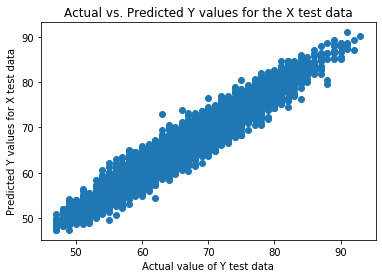

In [27]:
"""I am displaying a scatterplit in which the horizontal axis shows the actual value of the Y test data and the 
vertical axis displays the predicted Y values for the X test data."""
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual value of Y test data")
plt.ylabel("Predicted Y values for X test data")
plt.title("Actual vs. Predicted Y values for the X test data")
plt.show()

In [29]:
"""I am calculating and displaying the Root Mean Squared Error (RMSE) for this model."""
MSE_reg = np.mean((Y_test - y_pred)**2)
RMSE_reg = MSE_reg**(0.5)
print("RMSE:", RMSE_reg)

RMSE: rank    1.845659
dtype: float64


In [30]:
"""Here, I will use KNN to classify players' 'preferred foot.''"""

"""Displaying the count of each value present in the preferred_foot column."""
data_df["preferred_foot"].value_counts()

Right    13044
Left      4406
Name: preferred_foot, dtype: int64

In [31]:
"""Calculating which % of players acrually prefer their right foot."""
total_feet = len(data_df["preferred_foot"])
right_foot = data_df["preferred_foot"].value_counts()["Right"]
left_foot = data_df["preferred_foot"].value_counts()["Left"]
probability_rightfoot = (right_foot / total_feet)
probability_leftfoot = (left_foot / total_feet)

print(probability_rightfoot)

0.7475071633237822


In [33]:
"""Building a classifier using 10 available dimensions: shooting, passing, dribbling, defending, skill, movement,
power, mentality, goalkeeping. Then creating an X dataframe with just these 10 columns and displaying the first
5 rows."""
X_df = data_df[["shooting", "passing", "dribbling", "defending", "attacking", "skill", "movement", "power", "mentality", "goalkeeping"]]
X_df.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2


In [37]:
"""Rescaling (normalizing) the X data so that each IV has a mean of 0 and a standard deviation of 1, displaying
the first 3 rows of normalized data."""
scaler = StandardScaler()
scaled = scaler.fit_transform(X_df)
print(scaled[:3])

[[ 2.7843116   3.29664165  3.31535783 -1.39304935  3.40016362  3.54858025
   2.77464012  1.94428215  2.18061369  0.2816757 ]
 [ 0.59771861  1.22971891  1.87671942  2.13166681  1.59341682  0.59820902
   2.07280881  2.06650141  1.62369703  1.48110007]
 [ 2.85484686  1.72184337  2.59603862 -1.46804331  3.42167251  2.15689571
   1.65171003  2.70204154  1.82259584  3.48014068]]


In [38]:
"""Creating a test-train split to see how well the classifier performs out of sample. I will set Y to be the 
'preferred_foot' column of the database, using 30% of the data for testing anf setting the random state to 456. 
I will display the first 3 rows of X training data."""
X_train, X_test, Y_train, Y_test = train_test_split(scaled, data_df["preferred_foot"], test_size=0.3, random_state=456)
print(X_train[:3])

[[-2.01208594 -1.42775318 -1.51435684  0.44430269 -1.82649677 -1.57281886
  -0.96846017 -1.01342387 -1.55868391  0.54821445]
 [-0.46031026  0.34389488  0.74636066  0.4255542  -0.27785665  0.61676481
   0.69254058 -0.6467661  -0.30562141 -0.25140179]
 [ 0.31557757  0.1470451   0.12980134 -0.88684012  0.08779448  0.00442362
  -0.05607947 -0.40232758 -0.36529105 -1.85063428]]


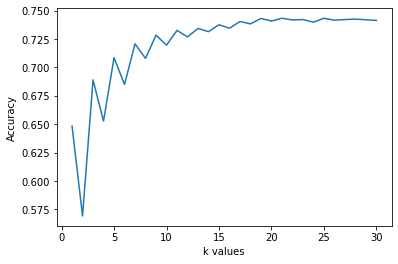

In [44]:
"""Calculating the number of neighbors k to consider for my KNN classifier, creating a plot with considered k values
along the horizontal axis and the corresponding error/accuracy displayed along the vertical axis."""
from sklearn.metrics import accuracy_score

k_values = range(1, 31)
accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accurate = accuracy_score(Y_test, y_pred)
    accuracy.append(accurate)

plt.plot(k_values, accuracy)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

In [45]:
"""Choosing a reasonable value of k, I am training a KNN classifier that considers this number of neighbors and
predicting Y values (preferred foot) for my out of sample test data, displaying the first 3 predictions for
'preferred foot.'"""
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
y_pref = knn.predict(X_test)
print(y_pref[:3])

['Right' 'Right' 'Right']


In [50]:
"""Using actual and predicted Y values to calculate and display the confusion matrix for my model, displaying without 
labels but showing classes in alphabetical order (Left, Right; upper left corner is 'Left-Left'). Then, calculating
how many players actually prefer their left food ('True Lefts') were predicted to prefer their right foot."""
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
print(matrix[0, 1])

[[ 104 1222]
 [ 135 3774]]
1222


In [51]:
"""Using the actual and predicted Y values to display the full classification report."""
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

        Left       0.44      0.08      0.13      1326
       Right       0.76      0.97      0.85      3909

    accuracy                           0.74      5235
   macro avg       0.60      0.52      0.49      5235
weighted avg       0.67      0.74      0.67      5235



In [54]:
"""Here, I will examine natural clusters in the data using K-Means. As the X data, I'll use the same 10 scaled features
that I used for KNN."""

"""Doing some additional pre-processing in order to run the analysis on only a sample of the data, taking the X values
that I calculated previously and converting it to a dataframe, displaying the first 5 rows."""
scaled_df = pd.DataFrame(X_train, columns=X_df.columns)
scaled_df.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,-2.012086,-1.427753,-1.514357,0.444303,-1.826497,-1.572819,-0.968460,-1.013424,-1.558684,0.548214
1,-0.460310,0.343895,0.746361,0.425554,-0.277857,0.616765,0.692541,-0.646766,-0.305621,-0.251402
2,0.315578,0.147045,0.129801,-0.886840,0.087794,0.004424,-0.056079,-0.402328,-0.365291,-1.850634
3,1.655747,2.017118,0.951880,-0.286888,1.206257,2.064117,0.552174,0.599870,0.788322,1.614369
4,-1.871015,0.245470,0.027041,1.137997,-0.578981,-0.181134,-0.453784,-0.744542,0.450194,0.281676


In [56]:
"""Randomly sampling the rows of the datadrame, selecting n=5000 rows and setting the rndom state to 2022. I saved
the sampled rows as a new dataframe and displayed the first 5 rows."""
X_train = pd.DataFrame(X_train, columns=X_df.columns)
sample = X_train.sample(n=5000, random_state=2022)
sample.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
3643,0.456648,-0.246654,-0.178478,-1.393049,0.410428,-0.385248,0.481991,0.770977,-0.504520,1.481100
594,1.303071,1.328144,2.082239,-0.905589,1.120221,1.655889,2.447119,-0.011226,1.245789,-1.450826
1659,-0.954057,-0.246654,-1.000557,0.575542,-0.449928,-0.923366,-0.360206,0.257656,-0.226062,0.681484
6688,0.879860,-0.345079,0.643601,-1.561786,0.668535,0.004424,0.715935,-0.109001,-1.021657,-0.784479
4183,-0.742451,-0.049805,-0.795038,1.044254,-0.643508,-0.979033,-0.126263,0.746533,-0.584080,0.814753


In [62]:
"""Calculating and saving the error (inertia) and the sillhouette score for possible values of k between 2 and 20
(inclusive). I set the random state to 789 for every value of k considered, and displayed the resulting list of
error values."""
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
k_values = range(2, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=789)
    kmeans.fit(sample)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(sample, kmeans.labels_, random_state=789))

print("Inertia Values: ", inertia)
print("Silhouette Values: ", silhouette)
                   

Inertia Values:  [30682.354985503396, 25246.096797236118, 21959.759448317578, 20155.025033342663, 18611.78630569528, 17731.472343433565, 16903.17054004801, 16205.343569358474, 15544.06484758031, 14942.164444623755, 14459.40718732694, 14040.596217668628, 13616.14495809829, 13234.57364755759, 12917.330566145227, 12642.261747464487, 12429.568020212075, 12210.170159995172, 11996.13272610765]
Silhouette Values:  [0.30615527652465324, 0.22364859093304923, 0.22618021384545028, 0.2157878251633083, 0.1882801148423524, 0.16883403598205918, 0.1650586092608727, 0.1644775860120085, 0.16574114258075193, 0.15874125418408047, 0.1559896774765573, 0.15484058402550274, 0.15485066885667906, 0.15383138516492031, 0.15212153510772727, 0.15217419769720356, 0.14436572429904967, 0.144511220286176, 0.14444004627405926]


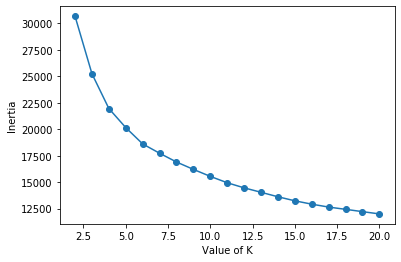

In [64]:
"""Plotting the error (inertia) for each value of k."""
plt.plot(k_values, inertia, '-o')
plt.xlabel("Value of K")
plt.ylabel("Inertia")
plt.show()

The suggested elbow value:  6


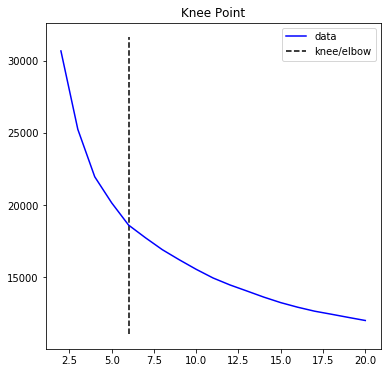

In [67]:
"""Using kneed package to estimatr the bend or "elbow" in the curve, then displaying the suggested elbow value."""
import kneed
from kneed import KneeLocator

kneeloc = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
kneeloc.plot_knee()
print("The suggested elbow value: ", kneeloc.elbow)

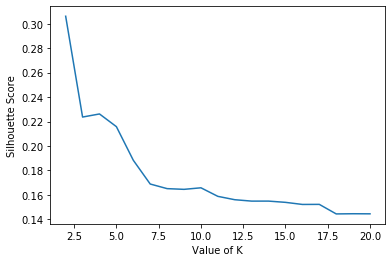

In [68]:
"""Plotting the Silhouette score for each value of k, showing considered values of k along the horizontal axis and 
corresponding Silhouette Scores along the vertical axis."""
plt.plot(k_values, silhouette)
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show()

In [69]:
"""Based on above analysis, I chose a k value and ran KMeans using the scaled X data, sample to 5k observations and
displayed the first 5 rows of the dataframe."""
kmn = KMeans(n_clusters=10, random_state=789)
kmn.fit(sample)
sample["cluster"] = kmeans.labels_
sample.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping,cluster
3643,0.456648,-0.246654,-0.178478,-1.393049,0.410428,-0.385248,0.481991,0.770977,-0.504520,1.481100,2
594,1.303071,1.328144,2.082239,-0.905589,1.120221,1.655889,2.447119,-0.011226,1.245789,-1.450826,3
1659,-0.954057,-0.246654,-1.000557,0.575542,-0.449928,-0.923366,-0.360206,0.257656,-0.226062,0.681484,17
6688,0.879860,-0.345079,0.643601,-1.561786,0.668535,0.004424,0.715935,-0.109001,-1.021657,-0.784479,11
4183,-0.742451,-0.049805,-0.795038,1.044254,-0.643508,-0.979033,-0.126263,0.746533,-0.584080,0.814753,17


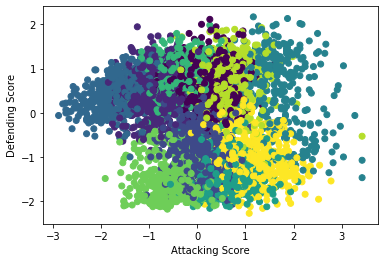

In [72]:
"""Creating and displaying a plot which shows a player's attacking scroe on the horizontal axis and their defending score
on the vertical axis."""
plt.scatter(sample["attacking"], sample["defending"], c=kmn.labels_)
plt.xlabel("Attacking Score")
plt.ylabel("Defending Score")
plt.show()